Datos cargados: 500000 filas, 14 columnas
Datos de entrenamiento: 400000 muestras
Datos de prueba: 100000 muestras
Número de features: 6
Número de clases: 3


c:\Users\tomku\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,627 (10.26 KB)

 Trainable params: 2,627 (10.26 KB)

 Non-trainable params: 0 (0.00 B)


Iniciando entrenamiento...
Epoch 1/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.9791 - loss: 0.0943 - val_accuracy: 0.9896 - val_loss: 0.0473
Epoch 2/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9886 - loss: 0.0465 - val_accuracy: 0.9899 - val_loss: 0.0439
Epoch 3/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9890 - loss: 0.0430 - val_accuracy: 0.9886 - val_loss: 0.0524
Epoch 4/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9891 - loss: 0.0425 - val_accuracy: 0.9899 - val_loss: 0.0473
Epoch 5/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9892 - loss: 0.0421 - val_accuracy: 0.9901 - val_loss: 0.0413
Epoch 6/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9893 - loss: 0.0414 - val_accuracy: 0.9898 - val_loss: 0.0411
Epoch 7/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9896 - loss: 0.0406 - val_accuracy: 0.9897 - val_loss: 0.0428
Epoch 8/20
12500/12500 ━━━━━━━━━━━━━━━━━━

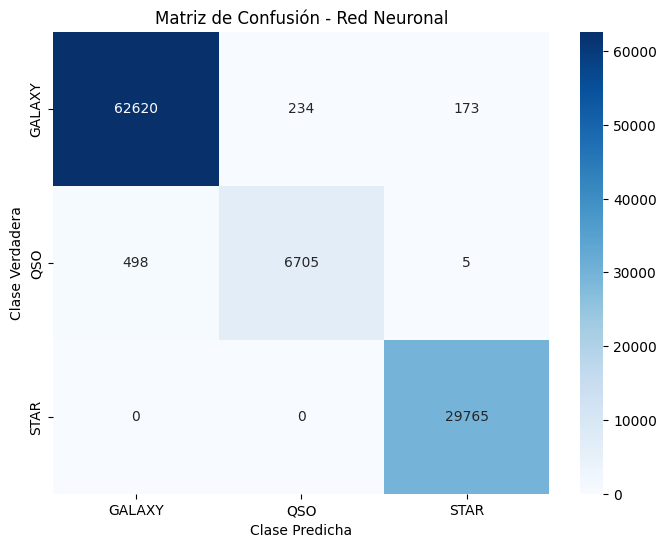

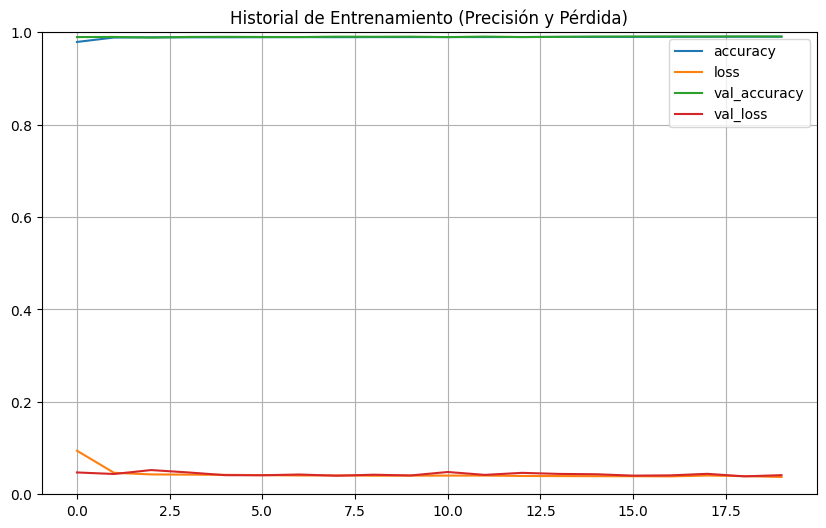

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carga y Preparación de Datos ---

# Cargar los datos desde tu archivo CSV
try:
    data = pd.read_csv("specphoto_dr19_500k_STAR_GAL_QSO.csv")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'specphoto_dr19_500k_STAR_GAL_QSO.csv'")
    exit()

print(f"Datos cargados: {data.shape[0]} filas, {data.shape[1]} columnas")

# !---- ESTA ES LA CORRECCIÓN ----!
# Usamos los nombres de columna correctos que vimos en el archivo CSV:
# 'u' -> 'psfMag_u'
# 'g' -> 'psfMag_g'
# 'r' -> 'psfMag_r'
# 'i' -> 'psfMag_i'
# 'z' (magnitud) -> 'psfMag_z'
# 'redshift' -> 'z'
features = ['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'z']
target = 'class'

X = data[features]
y_raw = data[target]

# --- 2. Preprocesamiento ---

# A. Codificar el Target (y)
# Convertir las etiquetas de texto ('STAR', 'GALAXY', 'QSO') a números (0, 1, 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_raw)

# Convertir a formato One-Hot (fundamental para softmax)
y_categorical = to_categorical(y_encoded)

# B. División de Datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, 
    test_size=0.2, 
    random_state=42,
    stratify=y_categorical
)

# C. Escalar las Features (X)
# (Muy importante para Redes Neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Datos de entrenamiento: {X_train_scaled.shape[0]} muestras")
print(f"Datos de prueba: {X_test_scaled.shape[0]} muestras")
print(f"Número de features: {X_train_scaled.shape[1]}")
print(f"Número de clases: {y_categorical.shape[1]}")

# --- 3. Construcción del Modelo de Red Neuronal ---

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2)) # Capa Dropout para prevenir sobreajuste
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# --- 4. Compilación del Modelo ---

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# --- 5. Entrenamiento del Modelo ---

print("\nIniciando entrenamiento...")
history = model.fit(
    X_train_scaled, 
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)
print("Entrenamiento finalizado.")

# --- 6. Evaluación del Modelo ---

score = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nResultados de la Evaluación en Test:")
print(f"  Pérdida (Loss): {score[0]:.4f}")
print(f"  Precisión (Accuracy): {score[1]:.4f}")

# --- 7. Matriz de Confusión y Reporte ---

# Obtener las predicciones
y_pred_probs = model.predict(X_test_scaled)
y_pred_encoded = np.argmax(y_pred_probs, axis=1)
y_test_encoded = np.argmax(y_test, axis=1)

# Nombres de las clases
class_names = label_encoder.classes_

print("\nReporte de Clasificación:")
print(classification_report(y_test_encoded, y_pred_encoded, target_names=class_names))

# Graficar Matriz de Confusión
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión - Red Neuronal')
plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')
plt.savefig("nn_confusion_matrix.png") # Guardar la imagen
print("Matriz de confusión guardada como 'nn_confusion_matrix.png'")

# Graficar historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.title('Historial de Entrenamiento (Precisión y Pérdida)')
plt.gca().set_ylim(0, 1)
plt.savefig("nn_training_history.png") # Guardar la imagen
print("Historial de entrenamiento guardado como 'nn_training_history.png'")

plt.show()